   comprimento_pétala  largura_pétala  comprimento_sépala  largura_sépala  \
0                 5.1             3.5                 1.4             0.2   
1                 7.0             3.2                 4.7             1.4   
2                 6.3             3.3                 6.0             2.5   
3                 5.0             3.6                 1.4             0.2   
4                 6.7             3.1                 4.4             1.4   
5                 4.9             3.0                 1.4             0.2   
6                 5.8             2.7                 5.1             1.9   
7                 5.4             3.9                 1.7             0.4   
8                 6.1             2.8                 4.7             1.2   
9                 5.7             2.8                 4.1             1.3   

   target  
0       0  
1       1  
2       1  
3       0  
4       1  
5       0  
6       1  
7       0  
8       1  
9       1  


c:\Users\Bruno\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

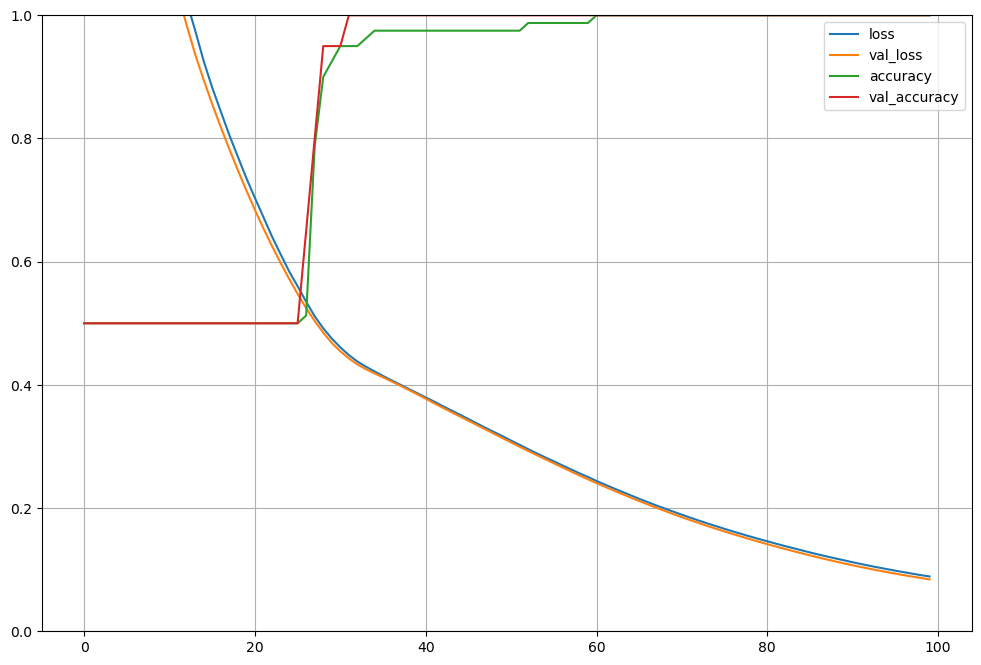

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
0    0
1    1
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: target, dtype: int64 0    0.919581
1    0.967335
2    0.969833
3    0.919125
4    0.963543
5    0.908028
6    0.954537
7    0.931260
8    0.953998
9    0.947009
Name: Result, dtype: float32


In [2]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#Preparação dos dados
data = pd.read_csv("flores.csv");
validacao = pd.read_csv("flores_Validacao.csv");
print(validacao);
features = ['comprimento_pétala', 'largura_pétala', 'comprimento_sépala','largura_sépala'];
X = data[features].copy();
Y = data["target"].copy();
X_val = validacao[features].copy();
Y_val = validacao["target"].copy();
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, train_size=0.8, random_state=4);
#Preparação dos dados

#Definindo o modelo
model = keras.models.Sequential();
model.add(keras.layers.Flatten(input_shape = [4,]));
model.add(keras.layers.Dense(16, activation="relu"));
#model.add(keras.layers.Dropout(rate = 0.2));
model.add(keras.layers.Dense(8, activation="relu"));
#model.add(keras.layers.Dropout(rate = 0.2));
model.add(keras.layers.Dense(1, activation="sigmoid"));
model.summary();
#Definindo o modelo

#Definindo sua compilação: Aqui você escolhe como a função perda, o tipo de optização e a metrica
#sparse_categorical: Deve ser usada para classificação multiclasse, quando existe mais de duas posibilidades de escolha
#binary: Deve ser usada para classificação simples, quando existe apenas duas clacificação, como a binária
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"]);

#Treino do modelo.
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)


df_history = pd.DataFrame(history.history)
df_history[["loss", "val_loss", "accuracy", "val_accuracy"]].plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# retorna um vetor com os valores das métricas que você definiu no compile.
model.evaluate(X_test, Y_test, verbose = 1);

#Faz a previsão
Result = X_val.copy();
Result["target"] = Y_val.copy();
Result["Result"] = model.predict(X_val);

print(Result["target"], Result["Result"]);